# Tomato Leaf Disease Detection Using Deep Learning

This notebook demonstrates a workflow for detecting tomato leaf diseases using deep learning and image processing techniques. The process includes data preparation, model building, training, evaluation, and prediction.

## Workflow Overview

1. **Data Preparation**
    - The dataset is organized into folders, each representing a disease category.
    - Images are loaded, resized to 256x256 pixels, and converted into arrays suitable for model input.
    - Labels are extracted from folder names and binarized for multi-class classification.

2. **Data Splitting**
    - The dataset is split into training and testing sets to evaluate model performance.

3. **Data Augmentation**
    - Image augmentation techniques (rotation, shift, shear, zoom, flip) are applied to increase data diversity and improve model generalization.

4. **Model Architecture**
    - A Convolutional Neural Network (CNN) is built using Keras, consisting of multiple convolutional, pooling, batch normalization, dropout, and dense layers.
    - The model is designed to extract features from images and classify them into disease categories.

5. **Training and Hyperparameter Tuning**
    - The model is trained with different combinations of learning rates, epochs, and batch sizes.
    - Early stopping and model checkpointing are used to prevent overfitting and save the best model.

6. **Evaluation**
    - The best model is selected based on validation accuracy.
    - Performance is evaluated on the test set, and metrics such as accuracy and loss are reported.
    - Training and validation accuracy/loss curves are plotted for analysis.

7. **Prediction**
    - The trained model is used to predict the disease class of new images.
    - The predicted class is displayed along with the input image.

8. **Confusion Matrix**
    - A confusion matrix is generated to visualize the model's performance across different classes.
    - Both raw and normalized confusion matrices are displayed.

This workflow provides a comprehensive approach to building an image classification model for plant disease detection, leveraging modern deep learning techniques and best practices in model evaluation.

Source: https://pythongeeks.org/python-opencv-leaf-disease-detection/

In [ ]:
# !pip install numpy opencv-python scikit-learn matplotlib tensorflow keras

In [ ]:
import numpy as np
import cv2
import pickle

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout, Flatten, Dense

# Use tensorflow.keras for preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.optimizers import Adam

In [3]:
# !kaggle datasets download -d vipoooool/new-plant-diseases-dataset

In [4]:
# !unzip new-plant-diseases-dataset.zip

In [2]:
default_image_size = (256, 256)

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None

In [ ]:
import os

# Download the dataset from Google Drive
file_id = "1lRmJSh-_f6-1ziGyeAAiG57UvtNOsdfX"

# Download the file from Google Drive using gdown
!gdown --id $file_id

# Rename the downloaded file
old_file_name = "tomatoDataset(Augmented).zip"  # Replace with the original downloaded file name
new_file_name = "tomatoDataset.zip"  # Replace with the desired new file name
os.rename(old_file_name, new_file_name)

In [3]:
import os
from os import listdir

dataset_dir = 'tomatoDataset(Augmented)'
all_folders = listdir(dataset_dir)
print("All folders in dataset:", all_folders)

plant_folders = [folder for folder in all_folders if os.path.isdir(os.path.join(dataset_dir, folder))]
print("Plant folders:", plant_folders)


All folders in dataset: ['valid', 'train', 'desktop.ini']
Plant folders: ['valid', 'train']


In [5]:
import os

dataset_dir = 'tomatoDataset(Augmented)/train'
print("Contents of dataset_dir:", os.listdir(dataset_dir))


Contents of dataset_dir: ['Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'desktop.ini']


In [6]:
image_list = []
label_list = []
dataset_dir = 'tomatoDataset(Augmented)/train'

try:
    # Get plant folders
    plant_folders = [folder for folder in listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))]
    print("Plant folders found:", plant_folders)

    for plant_folder in plant_folders:
        # Check if 'tomato' is in the folder name
        if 'tomato' in plant_folder.lower():
            print(f"Processing folder: {plant_folder}")
            # Since each folder already represents a disease category, we process directly.
            # Optionally, you can extract disease name by splitting the folder name.
            disease = plant_folder.split('___')[-1]
            print(f"Processing disease: {disease} ...")
            folder_path = os.path.join(dataset_dir, plant_folder)
            image_files = [img for img in listdir(folder_path) if img.endswith(('.jpg', '.JPG'))]
            print(f"Found {len(image_files)} images in {plant_folder}")
            for image_file in image_files[:300]: # Number of Images trained
                img_path = os.path.join(folder_path, image_file)
                img_array = convert_image_to_array(img_path)
                if img_array is not None and img_array.size:
                    image_list.append(img_array)
                    label_list.append(disease)
                else:
                    print(f"Image not loaded: {img_path}")
except Exception as e:
    print(f"Error: {e}")

print(f"Total images processed: {len(image_list)}")


Plant folders found: ['Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___healthy']
Processing folder: Tomato___Tomato_mosaic_virus
Processing disease: Tomato_mosaic_virus ...
Found 1790 images in Tomato___Tomato_mosaic_virus
Processing folder: Tomato___Target_Spot
Processing disease: Target_Spot ...
Found 1827 images in Tomato___Target_Spot
Processing folder: Tomato___Tomato_Yellow_Leaf_Curl_Virus
Processing disease: Tomato_Yellow_Leaf_Curl_Virus ...
Found 1961 images in Tomato___Tomato_Yellow_Leaf_Curl_Virus
Processing folder: Tomato___Septoria_leaf_spot
Processing disease: Septoria_leaf_spot ...
Found 1745 images in Tomato___Septoria_leaf_spot
Processing folder: Tomato___Leaf_Mold
Processing disease: Leaf_Mold ...
Found 1882 images in Tomato___Leaf_Mold

In [7]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))  # using a tuple for size
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None


In [8]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer, open('label_transform.pkl', 'wb'))
print("Classes:", label_binarizer.classes_)

np_image_list = np.array(image_list, dtype=np.float16) / 225.0
train_x, test_x, train_y, test_y = train_test_split(np_image_list, image_labels, test_size=0.5, random_state=75)

Classes: ['Bacterial_spot' 'Early_blight' 'Late_blight' 'Leaf_Mold'
 'Septoria_leaf_spot' 'Spider_mites Two-spotted_spider_mite' 'Target_Spot'
 'Tomato_Yellow_Leaf_Curl_Virus' 'Tomato_mosaic_virus' 'healthy']


In [9]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2, horizontal_flip=True,
    fill_mode="nearest"
)

In [10]:
width, height, depth = 256, 256, 3
inputShape = (height, width, depth)
chanDim = -1

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(label_binarizer.classes_)))
model.add(Activation("softmax"))

c:\Users\Gareth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define hyperparameter options
learning_rates = [1e-3, 1e-4]
epochs_list = [50, 100]
batch_sizes = [64, 128]

# Store results for comparison
model_results = []

for lr in learning_rates:
    for epoch_ in epochs_list:
        for batch_size in batch_sizes:
            print(f"Training model with LR={lr}, Epochs={epoch_}, Batch Size={batch_size}")
            
            # Compile the model with the current learning rate
            opt = Adam(learning_rate=lr, decay=lr / epoch_)
            model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
            
            # Add callbacks
            early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
            model_checkpoint = ModelCheckpoint(f"model_lr-{lr}_epochs-{epoch_}_batch-{batch_size}.h5", 
                                                monitor="val_loss", save_best_only=True)
            
            # Train the model
            history = model.fit(
                aug.flow(train_x, train_y, batch_size=batch_size),
                validation_data=(test_x, test_y),
                steps_per_epoch=len(train_x) // batch_size,
                epochs=epoch_,
                callbacks=[early_stopping, model_checkpoint],
                verbose=1
            )
            
            # Evaluate the model
            scores = model.evaluate(test_x, test_y, verbose=0)
            accuracy = scores[1] * 100  # Convert accuracy to percentage
            print(f"Model with LR={lr}, Epochs={epoch_}, Batch Size={batch_size} achieved Accuracy={accuracy:.2f}%")
            
            # Save results
            model_results.append({
                "learning_rate": lr,
                "epochs": epoch_,
                "batch_size": batch_size,
                "accuracy": accuracy,
                "model_file": f"model_lr-{lr}_epochs-{epoch_}_batch-{batch_size}.h5"
            })

# Find the best model
best_model = max(model_results, key=lambda x: x["accuracy"])
print(f"Best Model: {best_model}")

Training model with LR=0.001, Epochs=50, Batch Size=32


c:\Users\Gareth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
c:\Users\Gareth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3786 - loss: 2.2292

46/46 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.3803 - loss: 2.2193 - val_accuracy: 0.0867 - val_loss: 6.5176
Epoch 2/50
 1/46 ━━━━━━━━━━━━━━━━━━━━ 1:13 2s/step - accuracy: 0.4688 - loss: 1.3523

c:\Users\Gareth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 371ms/step - accuracy: 0.4688 - loss: 1.3523 - val_accuracy: 0.1087 - val_loss: 6.2749
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5814 - loss: 1.3592

46/46 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.5818 - loss: 1.3576 - val_accuracy: 0.1047 - val_loss: 5.7758
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - accuracy: 0.5938 - loss: 1.3094 - val_accuracy: 0.0973 - val_loss: 6.5413
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6525 - loss: 1.0756 - val_accuracy: 0.1460 - val_loss: 11.1206
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - accuracy: 0.6250 - loss: 1.4690 - val_accuracy: 0.1480 - val_loss: 11.0581
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6163 - loss: 1.2690 - val_accuracy: 0.0913 - val_loss: 15.4737
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 254ms/step - accuracy: 0.6250 - loss: 1.0901 - val_accuracy: 0.0913 - val_loss: 15.5066
Model with LR=0.001, Epochs=50, Batch Size=32 achieved Accuracy=10.47%
Training model with LR=0.001, Epochs=50, Batch Size=64
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6109 - loss: 1.2579

23/23 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.6112 - loss: 1.2576 - val_accuracy: 0.1020 - val_loss: 19.6430
Epoch 2/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 1:04 3s/step - accuracy: 0.7500 - loss: 0.8506

23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 723ms/step - accuracy: 0.7500 - loss: 0.8506 - val_accuracy: 0.1060 - val_loss: 17.3125
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.6896 - loss: 1.0458 - val_accuracy: 0.0987 - val_loss: 20.7022
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 478ms/step - accuracy: 0.6875 - loss: 1.0120 - val_accuracy: 0.0980 - val_loss: 21.0024
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.7283 - loss: 0.8870 - val_accuracy: 0.0980 - val_loss: 17.3795
Epoch 6/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 1:04 3s/step - accuracy: 0.5938 - loss: 1.0979

23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 741ms/step - accuracy: 0.5938 - loss: 1.0979 - val_accuracy: 0.0993 - val_loss: 16.7144
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7899 - loss: 0.5951

23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.7897 - loss: 0.5970 - val_accuracy: 0.1160 - val_loss: 13.1968
Epoch 8/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 1:04 3s/step - accuracy: 0.7500 - loss: 0.6645

23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 599ms/step - accuracy: 0.7500 - loss: 0.6645 - val_accuracy: 0.1207 - val_loss: 13.1337
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.8008 - loss: 0.5643 - val_accuracy: 0.1173 - val_loss: 14.5617
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 498ms/step - accuracy: 0.8438 - loss: 0.5653 - val_accuracy: 0.1213 - val_loss: 14.3539
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8248 - loss: 0.5321

23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.8239 - loss: 0.5349 - val_accuracy: 0.1440 - val_loss: 10.7055
Epoch 12/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 1:03 3s/step - accuracy: 0.7812 - loss: 0.9049

23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 615ms/step - accuracy: 0.7812 - loss: 0.9049 - val_accuracy: 0.1833 - val_loss: 10.6307
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.8283 - loss: 0.5210 - val_accuracy: 0.1387 - val_loss: 14.3937
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 721ms/step - accuracy: 0.8594 - loss: 0.5372 - val_accuracy: 0.1247 - val_loss: 14.8070
Epoch 15/50
14/23 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.8059 - loss: 0.5746

In [12]:
scores = model.evaluate(test_x, test_y)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")

47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step - accuracy: 0.6422 - loss: 0.2301
Test Accuracy: 63.73%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted class: Bacterial_spot


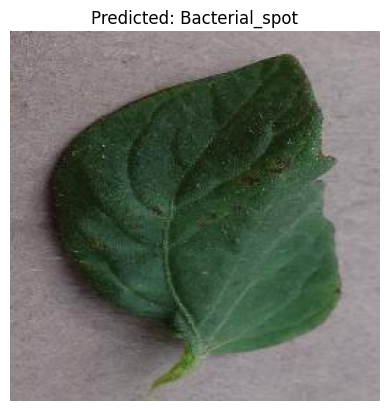

In [13]:
# Load and preprocess a sample image for prediction
sample_img_path = "tomatoDataset(Augmented)/valid/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG"
sample_img = convert_image_to_array(sample_img_path)
sample_img_norm = np.array(sample_img, dtype=np.float16) / 225.0
sample_img_norm = np.expand_dims(sample_img_norm, axis=0)

result = model.predict(sample_img_norm)
predicted_index = np.argmax(result, axis=1)[0]
predicted_class = label_binarizer.classes_[predicted_index]
print("Predicted class:", predicted_class)

# Display the image with the prediction
from PIL import Image
image = Image.open(sample_img_path)
plt.imshow(image)
plt.axis('off')
plt.title("Predicted: " + predicted_class)
plt.show()

In [ ]:
# model.save("leaf_disease_detector.h5")

In [ ]:
# model.save("tomato_disease_detector.keras")
# Save the model architecture and weights

In [14]:
# Evaluate the model to get loss and accuracy
scores = model.evaluate(test_x, test_y, verbose=0)
loss = scores[0]
accuracy = scores[1] * 100  # Convert accuracy to percentage

# Format the model name with loss and accuracy
model_name = f"tomato_disease_detector_loss-{loss:.4f}_acc-{accuracy:.2f}.keras"

# Save the model
model.save(model_name)
print(f"Model saved as {model_name}")

Model saved as tomato_disease_detector_loss-0.2271_acc-63.73.keras
